<a href="https://colab.research.google.com/github/robd123/AML/blob/main/Project7/Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
%pip install visualkeras

     |████████████████████████████████| 798kB 9.4MB/s 


In [51]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import random
import visualkeras

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from matplotlib import figure, pyplot
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
datapath = os.path.join("datasets", "zipped", "")
os.makedirs(datapath, exist_ok=True)

# Dataset is already split into test and train data
file_path = "https://raw.githubusercontent.com/robd123/AML/master/Project7/facesDB.zip"

urllib.request.urlretrieve(file_path, datapath + "facesDB.zip")

('datasets/zipped/facesDB.zip', <http.client.HTTPMessage at 0x7f993b7f7890>)

In [3]:
!unzip datasets/zipped/facesDB.zip

Archive:  datasets/zipped/facesDB.zip
   creating: facesDB/S1/
  inflating: facesDB/S1/1.BMP        
  inflating: facesDB/S1/10.BMP       
  inflating: facesDB/S1/2.BMP        
  inflating: facesDB/S1/3.BMP        
  inflating: facesDB/S1/4.BMP        
  inflating: facesDB/S1/5.BMP        
  inflating: facesDB/S1/6.BMP        
  inflating: facesDB/S1/7.BMP        
  inflating: facesDB/S1/8.BMP        
  inflating: facesDB/S1/9.BMP        
  inflating: facesDB/S1/Thumbs.db    
   creating: facesDB/S10/
  inflating: facesDB/S10/1.BMP       
  inflating: facesDB/S10/10.BMP      
  inflating: facesDB/S10/2.BMP       
  inflating: facesDB/S10/3.BMP       
  inflating: facesDB/S10/4.BMP       
  inflating: facesDB/S10/5.BMP       
  inflating: facesDB/S10/6.BMP       
  inflating: facesDB/S10/7.BMP       
  inflating: facesDB/S10/8.BMP       
  inflating: facesDB/S10/9.BMP       
  inflating: facesDB/S10/Thumbs.db   
   creating: facesDB/S11/
  inflating: facesDB/S11/1.BMP       
  inflating

**Import Images and Split Train and Test Data**

---
Because of the relatively high number of target classes compared to images, 40 classes and 400 images, a direct train/test split is not feasible as it may leave certain target classes out of the test set entirely.  For this dataset, 2 images will be selected randomly from each target class and added to the test set with the rest added to the training set.


In [4]:
train_images = list()
train_labels = list()
test_images = list()
test_labels = list()
for i in range(1, 41):
  rands = random.sample(range(1, 11), 2) # Get 2 random numbers, these will be the indices of the images to be used in the test set
  for j in range(1, 11):
    img = cv2.imread("facesDB/S{0}/{1}.BMP".format(str(i), str(j)))
    if j in rands:
      test_images.append(img)
      test_labels.append(i - 1)
    else:
      train_images.append(img)
      train_labels.append(i - 1)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(320, 48, 48, 3)
(320,)
(80, 48, 48, 3)
(80,)


**Display Some of the Training Images**

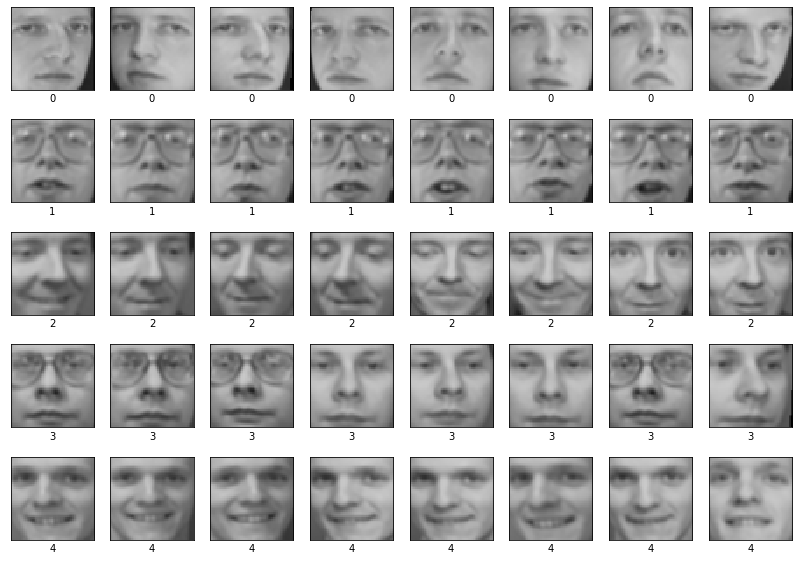

In [6]:
plt.figure( figsize=(14, 10), num='Some Images' )
plt.title( 'First 5 Targets' )
for i in range( 40 ):
    plt.subplot( 5, 8, i+1 )
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.xlabel(train_labels[i])
plt.show()

**Normalize Data**

In [7]:
x_train = train_images.astype( 'float32' )/255
x_test = test_images.astype( 'float32' )/255
print(x_train[0].shape)

(48, 48, 3)


In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(y_train.shape)
print(y_test.shape)

(320, 40)
(80, 40)


In [9]:
 def create_model_1():
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(40, activation="softmax")
    ])
  opt = SGD(momentum=0.5)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [15]:
model = create_model_1()

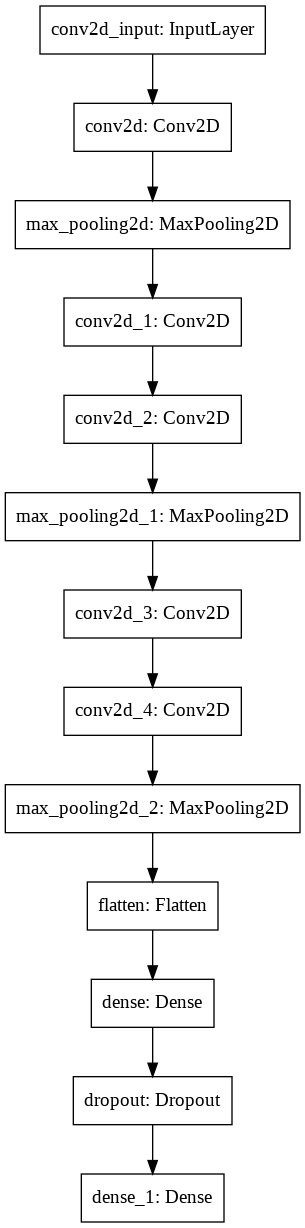

In [12]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )

In [16]:
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/50
40/40 [==============================] - 1s 14ms/step - loss: 3.6935 - accuracy: 0.0350 - val_loss: 3.6881 - val_accuracy: 0.0250
Epoch 2/50
40/40 [==============================] - 0s 8ms/step - loss: 3.6892 - accuracy: 0.0482 - val_loss: 3.6867 - val_accuracy: 0.0250
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6877 - accuracy: 0.0110 - val_loss: 3.6862 - val_accuracy: 0.0250
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6871 - accuracy: 0.0374 - val_loss: 3.6850 - val_accuracy: 0.0250
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6846 - accuracy: 0.0392 - val_loss: 3.6842 - val_accuracy: 0.0375
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6836 - accuracy: 0.0307 - val_loss: 3.6831 - val_accuracy: 0.0500
Epoch 7/50
40/40 [==============================] - 0s 7ms/step - loss: 3.6847 - accuracy: 0.0517 - val_loss: 3.6813 - val_accuracy: 0.0750
Epoch 8/50
40/40 [=

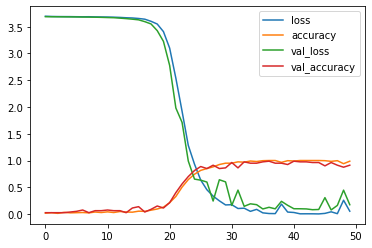

In [17]:
pd.DataFrame(model.history.history).plot()

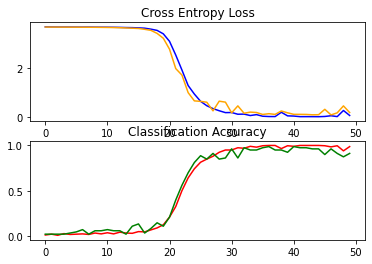

In [18]:
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(model.history.history['loss'], color='blue', label='train')
pyplot.plot(model.history.history['val_loss'], color='orange', label='test')	

pyplot.subplot(2, 1, 2)
pyplot.title('Classification Accuracy')
pyplot.plot(model.history.history['accuracy'], color='red', label='train')
pyplot.plot(model.history.history['val_accuracy'], color='green', label='test')
pyplot.show()

In [24]:
def evaluate_model(model, dataX, dataY, n_folds, batch_size, epochs, verbose):

  scores, histories = list(), list()
 
	# prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
 
	# enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
  
		# select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

		# fit model
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data= (testX, testY) , verbose = verbose)
  
		# evaluate model
    _, acc = model.evaluate(testX, testY)
    print('CV Fold accuracy:  %.3f' % (acc * 100.0))
  
		# stores scores
    scores.append(acc)
    histories.append(history)
  
  return scores, histories

In [20]:
def summarize_learning(histories):

  for i in range(len(histories)):
		
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='red', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='green', label='test')
  
    pyplot.show()

In [21]:
def summarize_performance(scores):

	# print summary
	print('Model Accuracy: mean=%.3f std=%.3f, folds=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

In [25]:
def predict_and_map(model, x_test, test_labels):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis = 1)
  cm = confusion_matrix(test_labels, pred_labels)
  plt.figure(figsize=(20,10))
  heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=np.arange(0,40), vmax=2, vmin=0, linewidths=.3, linecolor='black')
  heatmap.set(xlabel="Predicted", ylabel = "Actual")
  accuracy = accuracy_score(test_labels, pred_labels)
  print("Accuracy on Test Data: " + str(accuracy))
  return accuracy

In [28]:
def predict(model, x_test, test_labels):
  y_pred = model.predict(x_test)
  pred_labels = np.argmax(y_pred, axis = 1)
  accuracy = accuracy_score(test_labels, pred_labels)
  return accuracy

In [29]:
# The main driver for evaluating the model
def process(model, num_folds, batch_size, epochs, verbose, plot_results):
	# evaluate the model using CV
  scores, histories = evaluate_model(model, x_train, y_train, num_folds, batch_size, epochs, verbose)
 
  if plot_results:
	# learning curves
    summarize_learning(histories)
  
    # summarize estimated performance
    summarize_performance(scores)
    accuracy = predict_and_map(model, x_test, test_labels)
  else:
    accuracy = predict(model, x_test, test_labels)
  return accuracy

Epoch 1/30
15/15 [==============================] - 1s 26ms/step - loss: 3.6925 - accuracy: 0.0458 - val_loss: 3.6933 - val_accuracy: 0.0125
Epoch 2/30
15/15 [==============================] - 0s 13ms/step - loss: 3.6888 - accuracy: 0.0348 - val_loss: 3.6977 - val_accuracy: 0.0125
Epoch 3/30
15/15 [==============================] - 0s 11ms/step - loss: 3.6834 - accuracy: 0.0360 - val_loss: 3.7005 - val_accuracy: 0.0125
Epoch 4/30
15/15 [==============================] - 0s 12ms/step - loss: 3.6804 - accuracy: 0.0823 - val_loss: 3.7049 - val_accuracy: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 3.6795 - accuracy: 0.0208 - val_loss: 3.7083 - val_accuracy: 0.0125
Epoch 6/30
15/15 [==============================] - 0s 11ms/step - loss: 3.6761 - accuracy: 0.0513 - val_loss: 3.7136 - val_accuracy: 0.0250
Epoch 7/30
15/15 [==============================] - 0s 10ms/step - loss: 3.6798 - accuracy: 0.0339 - val_loss: 3.7169 - val_accuracy: 0.0250
Epoch 8/3

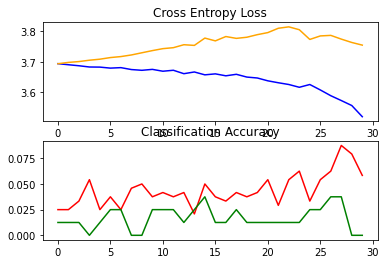

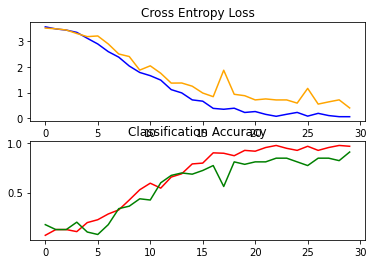

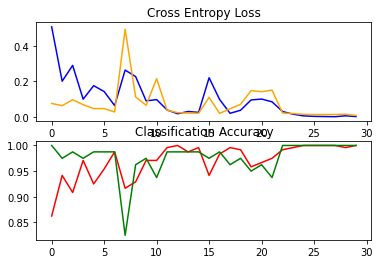

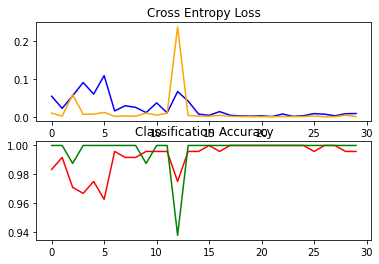

Model Accuracy: mean=72.813 std=42.190, folds=4
Accuracy on Test Data: 0.975


0.975

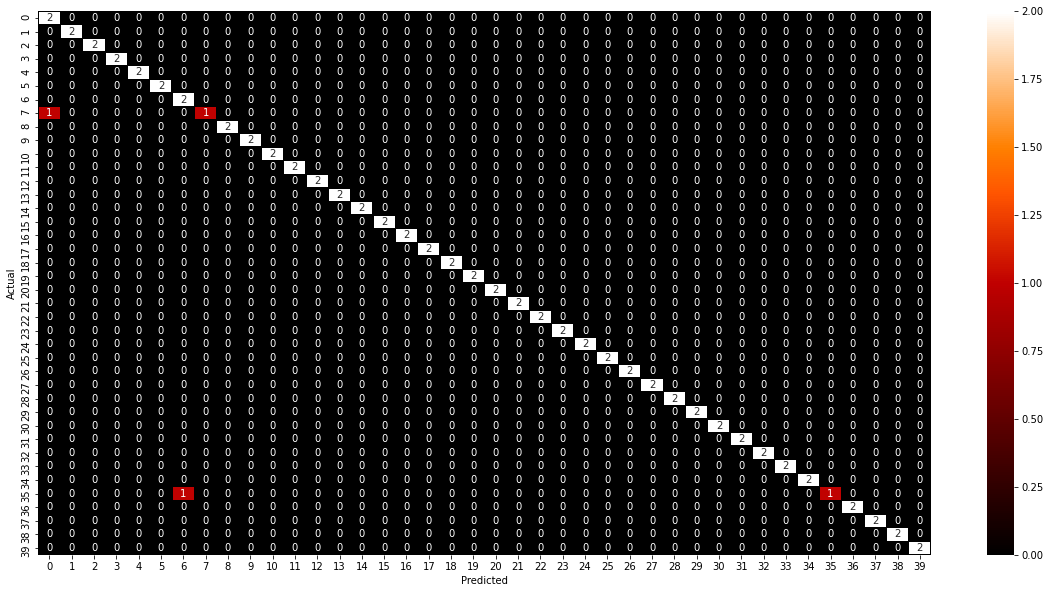

In [31]:
model = create_model_1()
process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 1, plot_results = True)

In [132]:
 def create_model(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [138]:
 def create_model_4_conv_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [139]:
 def create_model_4_dense_layers(optimizer, dropout):
  model = Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=x_train[0].shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(40, activation="softmax")
    ])
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

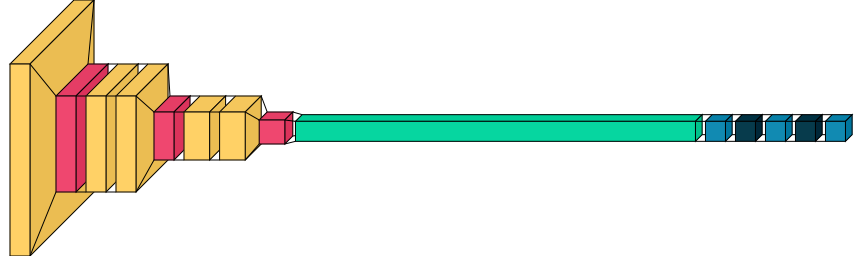

In [119]:
visualkeras.layered_view(model)

In [137]:
accuracy_scores = list()
names = list()

In [120]:
model = create_model(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.8049 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 6ms/step - loss: 1.0072 - accuracy: 0.7500
CV Fold accuracy:  75.000
3/3 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.9875
CV Fold accuracy:  98.750
3/3 [==============================] - 0s 5ms/step - loss: 6.8229e-04 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.9625


In [133]:
# Reduced Batch Size to 8
model = create_model(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 3.7116 - accuracy: 0.0375
CV Fold accuracy:  3.750
3/3 [==============================] - 0s 5ms/step - loss: 0.8222 - accuracy: 0.8500
CV Fold accuracy:  85.000
3/3 [==============================] - 0s 6ms/step - loss: 0.0971 - accuracy: 0.9625
CV Fold accuracy:  96.250
3/3 [==============================] - 0s 6ms/step - loss: 0.0114 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.975


In [136]:
# Increased Number of Convolution Layers
model = create_model_4_conv_layers(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.8041 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 5ms/step - loss: 0.8135 - accuracy: 0.7875
CV Fold accuracy:  78.750
3/3 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.9875
CV Fold accuracy:  98.750
3/3 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.975


In [140]:
model = create_model_4_dense_layers(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 8, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.8036 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 7ms/step - loss: 1.1834 - accuracy: 0.6625
CV Fold accuracy:  66.250
3/3 [==============================] - 0s 7ms/step - loss: 0.3053 - accuracy: 0.9250
CV Fold accuracy:  92.500
3/3 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.975


In [141]:
# Change SGD Momentum
model = create_model(SGD(momentum=0.8), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 3.3369 - accuracy: 0.1875
CV Fold accuracy:  18.750
3/3 [==============================] - 0s 5ms/step - loss: 0.7551 - accuracy: 0.8500
CV Fold accuracy:  85.000
3/3 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 1.0000
CV Fold accuracy:  100.000
3/3 [==============================] - 0s 5ms/step - loss: 3.8431e-05 - accuracy: 1.0000
CV Fold accuracy:  100.000
0.975


In [142]:
# Increase Batch Size
model = create_model(SGD(momentum=0.5), dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 32, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 3.7296 - accuracy: 0.0125
CV Fold accuracy:  1.250
3/3 [==============================] - 0s 6ms/step - loss: 3.6896 - accuracy: 0.0375
CV Fold accuracy:  3.750
3/3 [==============================] - 0s 5ms/step - loss: 1.2675 - accuracy: 0.6125
CV Fold accuracy:  61.250
3/3 [==============================] - 0s 5ms/step - loss: 0.5208 - accuracy: 0.9000
CV Fold accuracy:  90.000
0.9375


In [44]:
# Adam Optimizer
model = create_model('adam', dropout = 0.1)
accuracy = process(model, num_folds = 4, batch_size = 16, epochs = 30, verbose = 0, plot_results = False)
print(accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 2.7042 - accuracy: 0.2875
CV Fold accuracy:  28.750
3/3 [==============================] - 0s 5ms/step - loss: 1.0476 - accuracy: 0.7500
CV Fold accuracy:  75.000
3/3 [==============================] - 0s 6ms/step - loss: 0.2900 - accuracy: 0.9125
CV Fold accuracy:  91.250
3/3 [==============================] - 0s 6ms/step - loss: 0.1394 - accuracy: 0.9625
CV Fold accuracy:  96.250
0.875
